In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

# --- DATA ---
# Create a sample dataset (similar to the one in the prompt, but more complete)
data = {
    'Category': ['A', 'B', 'C', 'D', 'E', 'A', 'B', 'C', 'D', 'E'],
    'Year': [2020, 2020, 2020, 2020, 2020, 2021, 2021, 2021, 2021, 2021],
    'Value': [25, 32, 18, 45, 29, 30, 38, 22, 50, 33],
    'Region': ['North', 'South', 'North', 'South', 'East', 'North', 'South', 'North', 'South', 'East']
}
df = pd.DataFrame(data)


Bloated 3D Pie Chart:


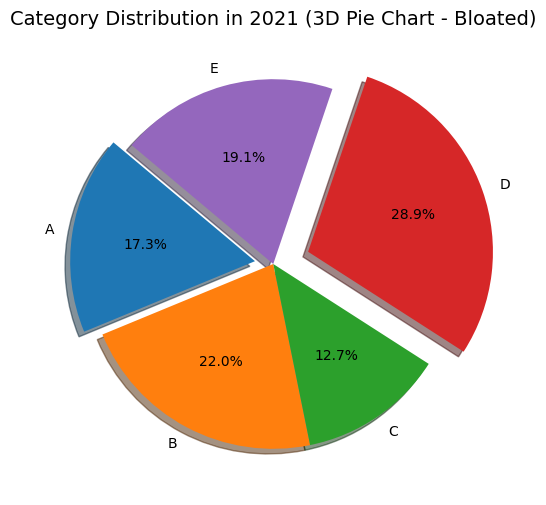


Decluttered 2D Pie Chart:


,Value
5,17.341040
6,21.965318
7,12.716763
8,28.901734
9,19.075145


[Text(-0.3109404541281089, 0.5131432879679957, ''),
 Text(-0.5869639692900013, -0.12439171497863666, ''),
 Text(-0.1614218904305075, -0.5778779916988025, ''),
 Text(0.5159453399325831, -0.3062685197695828, ''),
 Text(0.3384206013456957, 0.4954508013767035, '')]

0 - Text(0.0, 0.1, '')
deu erro nesse
1 - Text(0.0, 0.1, '')
deu erro nesse
2 - Text(0.0, 0.1, '')
deu erro nesse
3 - Text(0.0, 0.1, '')
deu erro nesse
4 - Text(0.0, 0.1, '')
deu erro nesse


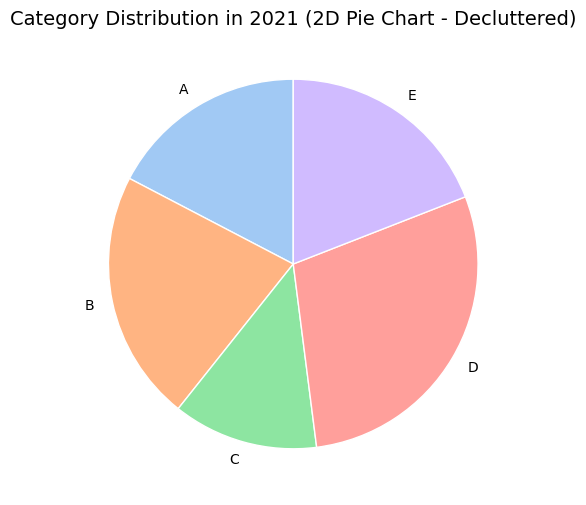

In [11]:
# --- BLOATED CHART 1: 3D Pie Chart ---

def bloated_pie_chart(df):
    """Creates a bloated 3D pie chart."""
    plt.figure(figsize=(8, 6))  # Adjust figure size for better layout
    df_2021 = df[df['Year'] == 2021]
    plt.pie(df_2021['Value'], labels=df_2021['Category'], autopct='%1.1f%%',
            shadow=True, startangle=140,  # 3D effect, hard to read
            explode=(0.1, 0, 0, 0.2, 0))  # Exploding slices makes it worse
    plt.title('Category Distribution in 2021 (3D Pie Chart - Bloated)', fontsize=14)
    plt.show()

def decluttered_pie_chart(df):
    """Creates a decluttered, 2D pie chart (though a bar chart is generally better)."""
    plt.figure(figsize=(8, 6))
    df_2021 = df[df['Year'] == 2021]
        # Calculate percentages outside of the pie chart for more control
    percentages = df_2021['Value'] / df_2021['Value'].sum() * 100
    display(percentages)

    # Create the pie chart
    wedges, texts, autotexts = plt.pie(
        df_2021['Value'],
        labels=df_2021['Category'],
        autopct="",  # Use an empty string for autopct initially
        startangle=90,  # Start at a conventional angle
        colors=sns.color_palette("pastel"), #Use a better color palette
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'} #Add borders to wedges

    )
    display(autotexts)
    # Manually set the percentage labels
    for i, autotext in enumerate(autotexts):
        autotext.set_position((wedges[i].center[0], wedges[i].center[1] + 0.1))
        print(f"{i} - {autotext}")
        try:
          autotext.set_text(f"{percentages[i]:.1f}%")
        except:
          print("deu erro nesse")
        autotext.set_color("black") #Make labels more readible
        autotext.set_fontsize(10)



    plt.title('Category Distribution in 2021 (2D Pie Chart - Decluttered)', fontsize=14)
    plt.show()

# --- RUN THE EXAMPLES ---
print("Bloated 3D Pie Chart:")
bloated_pie_chart(df)
print("\nDecluttered 2D Pie Chart:")
decluttered_pie_chart(df)


Bloated Clustered Bar Chart:


<ipython-input-12-a4520b82e38a>:8: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.barplot(x='Category', y='Value', hue='Region', data=df,


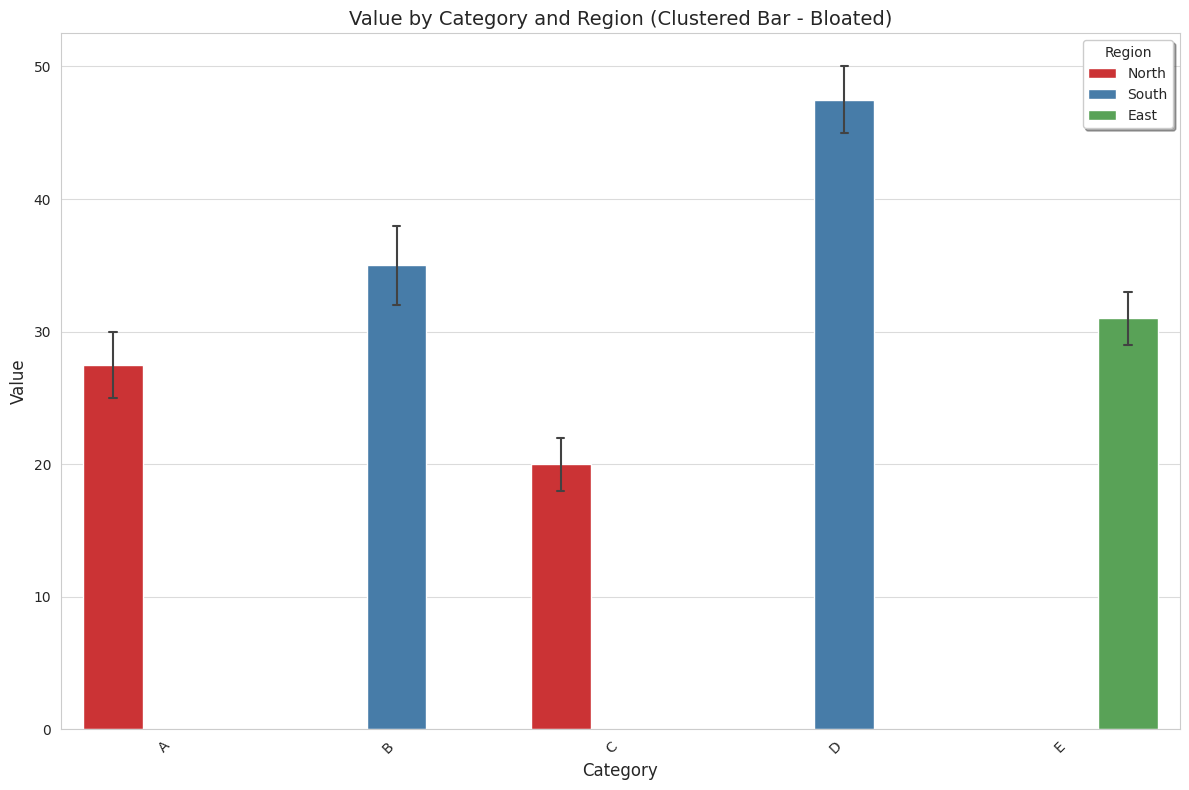


Decluttered Grouped Bar Chart:


<ipython-input-12-a4520b82e38a>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
<ipython-input-12-a4520b82e38a>:28: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  g = sns.catplot(


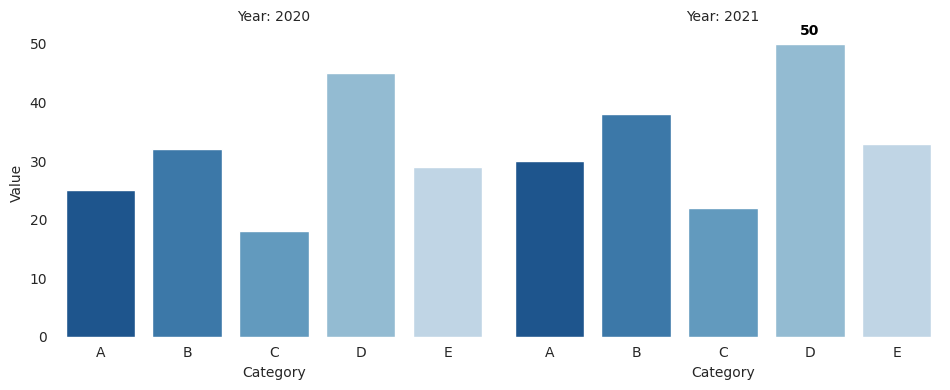

In [12]:
# --- BLOATED CHART 2: Clustered Bar Chart with Too Much Information ---

def bloated_clustered_bar(df):
    """Creates a cluttered, clustered bar chart."""
    plt.figure(figsize=(12, 8))
    sns.set_style("whitegrid") # Gridlines are often distracting.

    sns.barplot(x='Category', y='Value', hue='Region', data=df,
                palette='Set1',  # Bright, potentially clashing colors
                errwidth=1.5,  # Thick error bars
                capsize=0.1,   # Caps on error bars
                dodge=True)    # Default dodging can be too much

    plt.title('Value by Category and Region (Clustered Bar - Bloated)', fontsize=14)
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.xticks(rotation=45, ha='right')  # Rotated labels are harder to read
    plt.legend(title='Region', loc='upper right', frameon=True, shadow=True) #Legend with shadow.
    plt.grid(axis='y', linestyle='-', alpha=0.7) # Gridlines add clutter
    plt.tight_layout()  # Helps, but the chart is still too busy
    plt.show()


def decluttered_grouped_bar(df):
    """Creates a cleaner, grouped bar chart (facet grid)."""
    sns.set_style("white")  # Clean, minimalist style

    g = sns.catplot(
        x='Category',
        y='Value',
        col='Year',  # Separate plots by year
        data=df,
        kind='bar',
        palette=sns.color_palette("Blues_r"),  # Use a sequential palette
        height=4,  # Control height
        aspect=1.2, # Control width of each subplot.
        sharey=True # Use the same y scale
    )

    g.set_titles("Year: {col_name}", fontsize=12) # Clear and concise title.
    g.set_xlabels('Category', fontsize=10)  # Smaller font size
    g.set_ylabels('Value', fontsize=10)
    #Remove redundant x labels
    for ax in g.axes.flat:
      for label in ax.get_xticklabels():
          label.set_rotation(0) # Horizontal labels

    # Direct labeling of max values (storytelling element)
    for ax in g.axes.flat:
      for p in ax.patches:
          if p.get_height() == df['Value'].max(): # Find and label only the largest value.
              ax.annotate(f'{p.get_height():.0f}',
                          (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='center',
                          xytext=(0, 9),
                          textcoords='offset points',
                          fontsize=10, fontweight='bold', color='black')

    sns.despine(left=True, bottom=True)  # Remove unnecessary spines
    plt.tight_layout()
    plt.show()



print("\nBloated Clustered Bar Chart:")
bloated_clustered_bar(df)
print("\nDecluttered Grouped Bar Chart:")
decluttered_grouped_bar(df)


Bloated Line Chart:


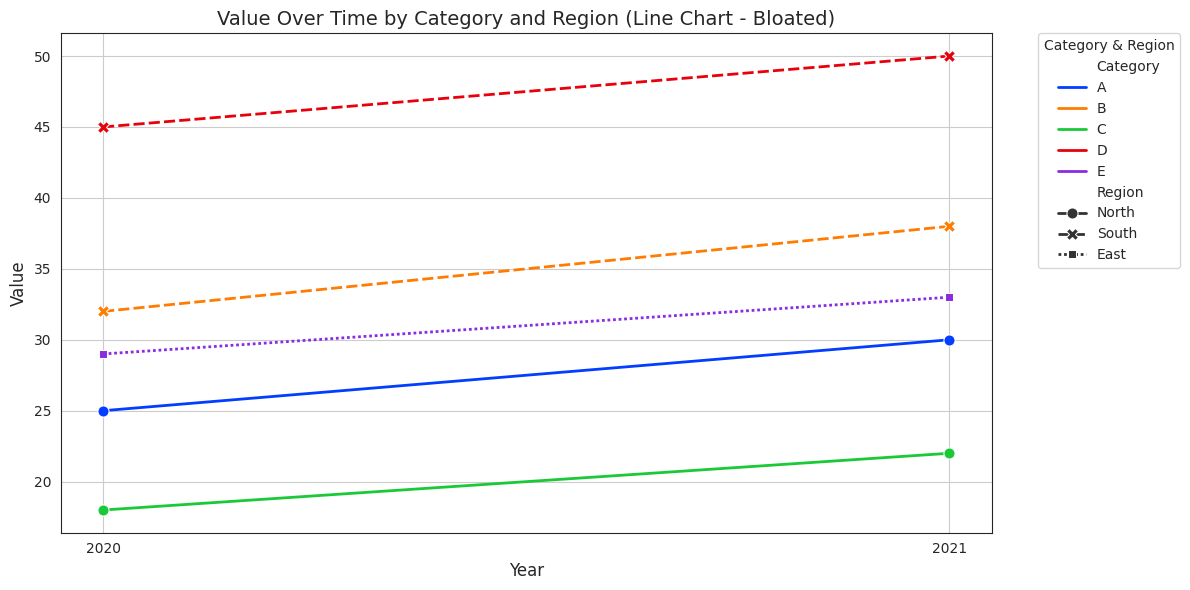


Decluttered Line Chart:


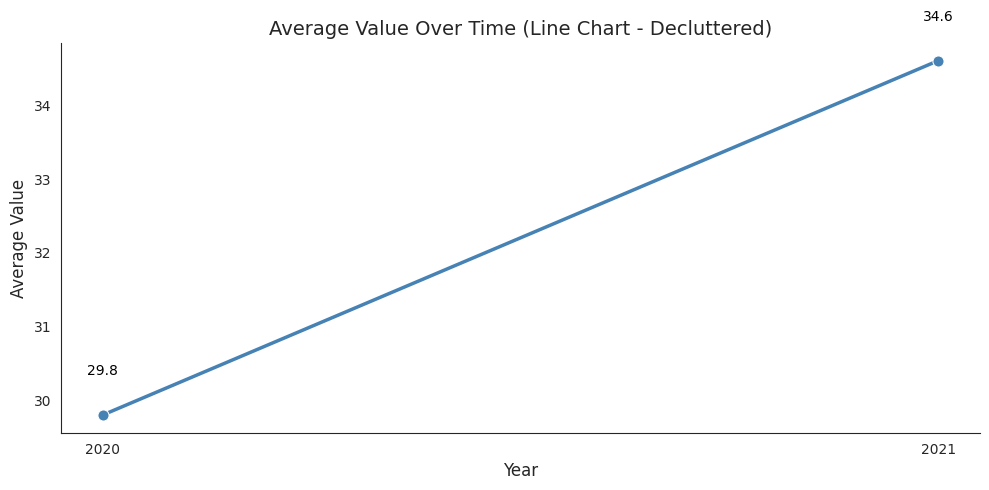

In [13]:
# --- BLOATED CHART 3: Line Chart with Too Many Lines and Markers ---

def bloated_line_chart(df):
    """Creates a cluttered line chart with excessive markers and lines."""
    plt.figure(figsize=(12, 6))

    sns.lineplot(x='Year', y='Value', hue='Category', style='Region', data=df,
                 palette='bright',  # Too many distinct colors
                 markers=True, dashes=True,  # All combinations of markers and dashes
                 linewidth=2, markersize=8) #Bold lines and big markers.

    plt.title('Value Over Time by Category and Region (Line Chart - Bloated)', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.xticks([2020, 2021])  # Ensure years are displayed
    plt.legend(title='Category & Region', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(True) #Grid
    plt.tight_layout()
    plt.show()



def decluttered_line_chart(df):
    """Creates a cleaner line chart, focusing on the overall trend."""
    plt.figure(figsize=(10, 5))

    # Calculate the average value per year, across all categories and regions
    df_agg = df.groupby('Year')['Value'].mean().reset_index()

    sns.lineplot(x='Year', y='Value', data=df_agg,
                 color='steelblue',  # Single, muted color
                 linewidth=2.5, marker='o', markersize=8)

    plt.title('Average Value Over Time (Line Chart - Decluttered)', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Average Value', fontsize=12)
    plt.xticks([2020, 2021])

    # Annotate the points directly (storytelling element)
    for x, y in zip(df_agg['Year'], df_agg['Value']):
        plt.text(x, y + 0.5, f'{y:.1f}', ha='center', va='bottom', fontsize=10, color='black')

    sns.despine()  # Remove top and right spines
    plt.tight_layout()
    plt.show()



print("\nBloated Line Chart:")
bloated_line_chart(df)
print("\nDecluttered Line Chart:")
decluttered_line_chart(df)

In [1]:
import pandas as pd
import numpy as np

# Gerando dados de exemplo
np.random.seed(42)
df = pd.DataFrame({
    'x': np.linspace(0, 10, 100),
    'y1': np.sin(np.linspace(0, 10, 100)) + np.random.normal(0, 0.1, 100),
    'y2': np.cos(np.linspace(0, 10, 100)) + np.random.normal(0, 0.1, 100)
})


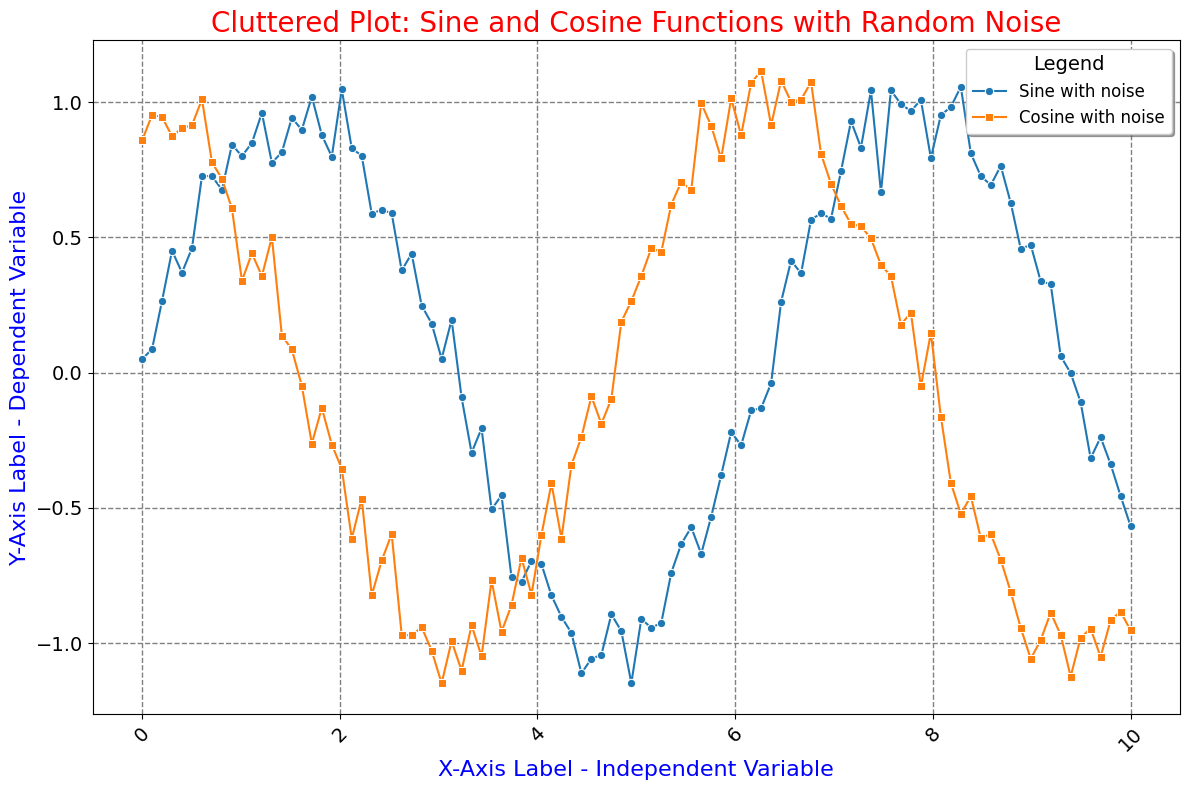

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='x', y='y1', label='Sine with noise', marker='o')
sns.lineplot(data=df, x='x', y='y2', label='Cosine with noise', marker='s')
plt.title("Cluttered Plot: Sine and Cosine Functions with Random Noise", fontsize=20, color='red')
plt.xlabel("X-Axis Label - Independent Variable", fontsize=16, color='blue')
plt.ylabel("Y-Axis Label - Dependent Variable", fontsize=16, color='blue')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.legend(title="Legend", fontsize=12, title_fontsize=14, loc='upper right', shadow=True, fancybox=True)
plt.grid(True, which='both', linestyle='--', linewidth=1, color='gray')
plt.tight_layout()
plt.show()


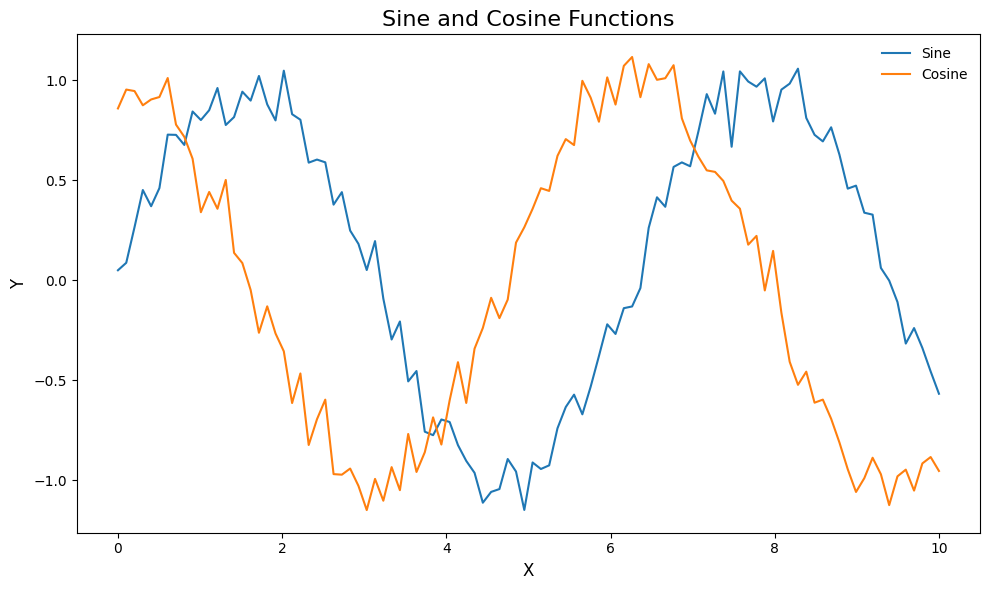

In [3]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='x', y='y1', label='Sine', marker='')
sns.lineplot(data=df, x='x', y='y2', label='Cosine', marker='')
plt.title("Sine and Cosine Functions", fontsize=16)
plt.xlabel("X", fontsize=12)
plt.ylabel("Y", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='best', frameon=False)
plt.grid(False)
plt.tight_layout()
plt.show()
